# Latent Fingerprints Clustering

In [1]:

# Importing Libraries
import pandas as pd
import numpy as np
rs = 123
# Others
import time
import glob
# Visualization
import matplotlib.pyplot as plt

### Additional Functions

In [2]:
def min_class(df):
    print("Value Counts:")
    cols = df.columns.tolist()
    for col in cols:
        print(col + " : " + str(df[col].value_counts().min()))

In [3]:
def to_categorical2(variable, threshold):
    if variable <= threshold : 
        return 0 
    else:
        return 1

In [4]:
def to_categorical3(variable ,threshold,threshold2):
    if variable <= threshold : 
        return 0
    elif (variable > threshold and variable < threshold2) :
        return 1
    else:
        return 2

## Data

In [10]:
df = pd.read_csv('df_complete.csv')

In [11]:
df.drop(['score_change_discretized_Kmeans2','score_change_discretized_quantile3','score_change_categorical2','score_change_categorical3'], axis = 1 ,inplace = True)

##  Partitions of 2 sets

In [12]:
df2 =  df[['fingerprint','minutia','score_change']].copy()

In [13]:
df2.score_change.describe()

count    5241.000000
mean       -0.072794
std         0.230984
min        -3.281286
25%        -0.178300
50%        -0.048776
75%         0.050199
max         1.333859
Name: score_change, dtype: float64

In [ ]:
# Two-partitions creation
start = 0.1
stop = 0.9
step = 0.015
float_range_array = np.arange(start, stop, step)
float_range_list = list(float_range_array)
thresholds_for_two = df2.score_change.quantile(float_range_list).values

[0.1, 0.115, 0.13, 0.14500000000000002, 0.16, 0.175, 0.19, 0.20500000000000002, 0.22, 0.23500000000000001, 0.25, 0.265, 0.28, 0.29500000000000004, 0.31, 0.32499999999999996, 0.33999999999999997, 0.355, 0.37, 0.385, 0.4, 0.41500000000000004, 0.42999999999999994, 0.44499999999999995, 0.45999999999999996, 0.475, 0.49, 0.505, 0.52, 0.535, 0.5499999999999999, 0.565, 0.58, 0.595, 0.61, 0.625, 0.64, 0.6549999999999999, 0.6699999999999999, 0.6849999999999999, 0.7, 0.715, 0.73, 0.745, 0.7599999999999999, 0.7749999999999999, 0.7899999999999999, 0.8049999999999999, 0.82, 0.835, 0.85, 0.865, 0.88, 0.8949999999999999]


54

In [ ]:
for i in range(len(thresholds_for_two)):
    df2['sc_c2_th' + str(i)] = df2['score_change'].apply(to_categorical2, args = [thresholds_for_two[i]])

In [ ]:
min_class(df2.iloc[:,3:])

Value Counts:
sc_c2_th0 : 525
sc_c2_th1 : 603
sc_c2_th2 : 682
sc_c2_th3 : 760
sc_c2_th4 : 839
sc_c2_th5 : 917
sc_c2_th6 : 996
sc_c2_th7 : 1075
sc_c2_th8 : 1153
sc_c2_th9 : 1232
sc_c2_th10 : 1311
sc_c2_th11 : 1389
sc_c2_th12 : 1468
sc_c2_th13 : 1546
sc_c2_th14 : 1625
sc_c2_th15 : 1703
sc_c2_th16 : 1782
sc_c2_th17 : 1861
sc_c2_th18 : 1939
sc_c2_th19 : 2018
sc_c2_th20 : 2097
sc_c2_th21 : 2175
sc_c2_th22 : 2254
sc_c2_th23 : 2332
sc_c2_th24 : 2411
sc_c2_th25 : 2490
sc_c2_th26 : 2568
sc_c2_th27 : 2594
sc_c2_th28 : 2516
sc_c2_th29 : 2437
sc_c2_th30 : 2359
sc_c2_th31 : 2280
sc_c2_th32 : 2201
sc_c2_th33 : 2123
sc_c2_th34 : 2044
sc_c2_th35 : 1965
sc_c2_th36 : 1887
sc_c2_th37 : 1808
sc_c2_th38 : 1730
sc_c2_th39 : 1651
sc_c2_th40 : 1573
sc_c2_th41 : 1494
sc_c2_th42 : 1415
sc_c2_th43 : 1337
sc_c2_th44 : 1258
sc_c2_th45 : 1180
sc_c2_th46 : 1101
sc_c2_th47 : 1022
sc_c2_th48 : 944
sc_c2_th49 : 865
sc_c2_th50 : 786
sc_c2_th51 : 708
sc_c2_th52 : 629
sc_c2_th53 : 551


In [ ]:
df2.shape

(5241, 57)

##  Partitions of 3 sets 

In [ ]:
df3 =  df2.copy()

In [ ]:
# Three partitions creation
start1 = 0.1
stop1 = 0.4
step1 = 0.05
float_range_array1 = np.arange(start1, stop1, step1)
float_range_list1 = list(float_range_array1)
start2 = 0.5
stop2 = 0.9
step2 = 0.05
float_range_array2 = np.arange(start2, stop2, step2)
float_range_list2 = list(float_range_array2)
threshold1_for_3 = df3.score_change.quantile(float_range_list1).values
threshold2_for_3 = df3.score_change.quantile(float_range_list2).values

In [ ]:
threshold1_for_3 

array([-0.33450313, -0.26818967, -0.2172659 , -0.17829988, -0.14704887,
       -0.12033823, -0.09576661])

In [ ]:
threshold2_for_3

array([-0.04877619, -0.0273153 , -0.00591743,  0.00888546,  0.02897032,
        0.05019923,  0.07803899,  0.11663081])

In [ ]:
for i in range(len(threshold1_for_3)):
    for j in range(len(threshold2_for_3)):
        df3['sc_c3_th' + str(i) + '_' + str(j)] = df3['score_change'].apply(to_categorical3, args = [threshold1_for_3[i], threshold2_for_3[j]])

In [ ]:
df3.shape

(5241, 113)

In [ ]:
min_class(df3.iloc[:,57:])

Value Counts:
sc_c3_th0_0 : 525
sc_c3_th0_1 : 525
sc_c3_th0_2 : 525
sc_c3_th0_3 : 525
sc_c3_th0_4 : 525
sc_c3_th0_5 : 525
sc_c3_th0_6 : 525
sc_c3_th0_7 : 525
sc_c3_th1_0 : 787
sc_c3_th1_1 : 787
sc_c3_th1_2 : 787
sc_c3_th1_3 : 787
sc_c3_th1_4 : 787
sc_c3_th1_5 : 787
sc_c3_th1_6 : 787
sc_c3_th1_7 : 786
sc_c3_th2_0 : 1049
sc_c3_th2_1 : 1049
sc_c3_th2_2 : 1049
sc_c3_th2_3 : 1049
sc_c3_th2_4 : 1049
sc_c3_th2_5 : 1049
sc_c3_th2_6 : 1048
sc_c3_th2_7 : 786
sc_c3_th3_0 : 1309
sc_c3_th3_1 : 1311
sc_c3_th3_2 : 1311
sc_c3_th3_3 : 1311
sc_c3_th3_4 : 1311
sc_c3_th3_5 : 1310
sc_c3_th3_6 : 1048
sc_c3_th3_7 : 786
sc_c3_th4_0 : 1047
sc_c3_th4_1 : 1310
sc_c3_th4_2 : 1572
sc_c3_th4_3 : 1573
sc_c3_th4_4 : 1572
sc_c3_th4_5 : 1310
sc_c3_th4_6 : 1048
sc_c3_th4_7 : 786
sc_c3_th5_0 : 785
sc_c3_th5_1 : 1048
sc_c3_th5_2 : 1310
sc_c3_th5_3 : 1572
sc_c3_th5_4 : 1572
sc_c3_th5_5 : 1310
sc_c3_th5_6 : 1048
sc_c3_th5_7 : 786
sc_c3_th6_0 : 523
sc_c3_th6_1 : 786
sc_c3_th6_2 : 1048
sc_c3_th6_3 : 1310
sc_c3_th6_4 : 1572
sc

## Create Report with CSV

In [ ]:
df3.shape

(5241, 113)

In [ ]:
list_targets = list(df3.columns[3:])
len(list_targets)

110

In [ ]:
def generate_separate_files(df,df_target):
    list_targets = list(df_target.columns[3:])
    for target in list_targets:
        df_cluster = df_target[[target, 'fingerprint','minutia','score_change']]
        dataset = pd.merge(df, df_cluster, on = ['fingerprint','minutia', 'score_change'], how = 'inner')
        dataset.to_csv('csv_partitions/' + str(target) + '.csv', index = False)


In [ ]:
#This function was used to generate the folder with all csv partitions.
generate_separate_files(df,df3)

## Explore Cluster Size

In [ ]:
#df3.to_csv('master_df.csv')

In [ ]:
df3.iloc[:,:57]

,fingerprint,minutia,score_change,sc_c2_th0,sc_c2_th1,sc_c2_th2,sc_c2_th3,sc_c2_th4,sc_c2_th5,sc_c2_th6,...,sc_c2_th44,sc_c2_th45,sc_c2_th46,sc_c2_th47,sc_c2_th48,sc_c2_th49,sc_c2_th50,sc_c2_th51,sc_c2_th52,sc_c2_th53
0,U294X6I_1_1,v0,0.260703,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,U294X6I_1_1,v1,0.270683,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,U294X6I_1_1,v2,0.270088,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,U294X6I_1_1,v3,-0.288866,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,U294X6I_1_1,v4,0.052454,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,B155X6I_1_1,v23,-0.021419,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5237,B155X6I_1_1,v24,-0.197318,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5238,B155X6I_1_1,v25,-0.073563,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5239,B155X6I_1_1,v26,-0.235049,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
trasposed_df = df3.iloc[:,3:57].T.rename_axis('Divisions', axis = 1)

In [ ]:
trasposed_df.loc[:,'C1'] = trasposed_df.sum(axis = 1)

In [ ]:
trasposed_df.loc[:,'C2'] = 5241 - trasposed_df['C1']

In [ ]:
clusters_size_two = trasposed_df[['C1','C2']]

In [ ]:
clusters_size_two.shape

(54, 2)

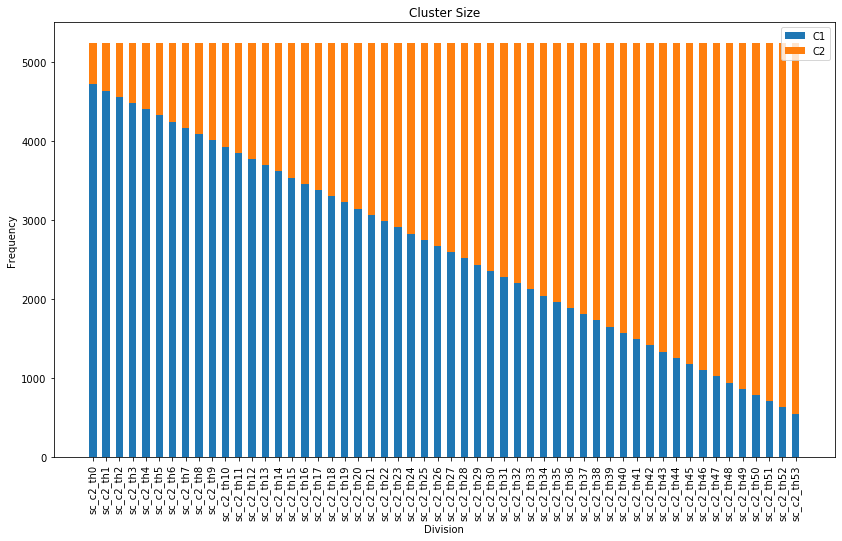

In [ ]:
labels = clusters_size_two.index
width = 0.55 # the width of the bars
values_C1 = clusters_size_two.values[:,0]
values_C2 = clusters_size_two.values[:,1]
fig, ax = plt.subplots(figsize = (14,8))
bar1 = ax.bar(labels, values_C1 , width , label = 'C1')
bar2 = ax.bar(labels, values_C2, width , bottom = values_C1, label = 'C2')
#text for labels, title and custom axis
ax.set_ylabel('Frequency')
ax.set_xlabel('Division')
plt.xticks(rotation =90)
ax.set_title('Cluster Size')
ax.legend()
plt.show()


In [ ]:
trasposed_df2 = df3.iloc[:,57:].T.rename_axis('Divisions', axis = 1)

In [ ]:
trasposed_df2['C1'] = trasposed_df2.apply(lambda row: sum(row[:] == 0), axis = 1)
trasposed_df2['C2'] = trasposed_df2.apply(lambda row: sum(row[:] == 1), axis = 1)
trasposed_df2['C3'] = trasposed_df2.apply(lambda row: sum(row[:] == 2), axis = 1)

In [ ]:
clusters_size_three = trasposed_df2[['C1','C2','C3']]

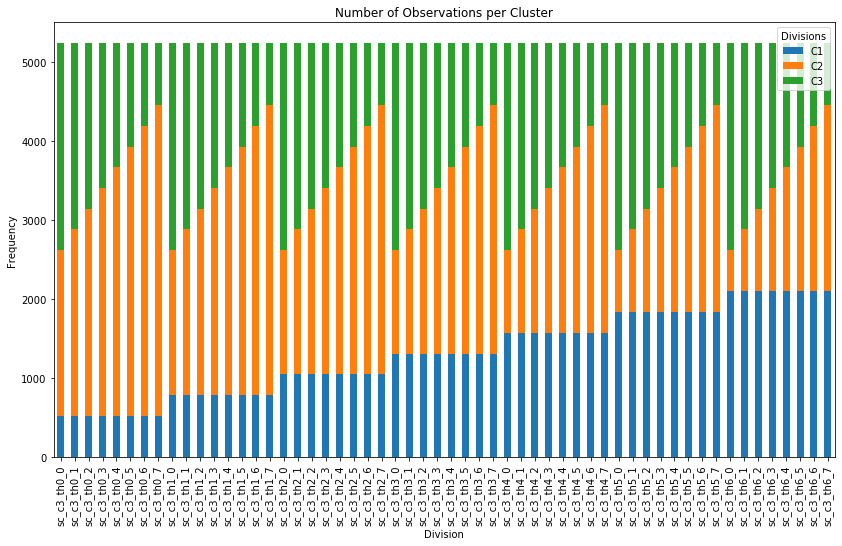

In [ ]:
ax = clusters_size_three.plot(kind = 'bar',
                    figsize = (14,8),
                    title = 'Number of Observations per Cluster', 
                    stacked = True)
ax.set_xlabel('Division')
ax.set_ylabel('Frequency')
plt.show()

## Export Size

In [ ]:
clusters_size_two.shape

(54, 2)

In [ ]:
clusters_size_three.shape

(56, 3)

In [ ]:
size_df = pd.concat([clusters_size_two, clusters_size_three], axis = 0)

In [ ]:
size_df.shape

(110, 3)

In [ ]:
size_df 

,C1,C2,C3
sc_c2_th0,4716,525,NaN
sc_c2_th1,4638,603,NaN
sc_c2_th2,4559,682,NaN
sc_c2_th3,4481,760,NaN
sc_c2_th4,4402,839,NaN
...,...,...,...
sc_c3_th6_3,2097,1310,1834.0
sc_c3_th6_4,2097,1572,1572.0
sc_c3_th6_5,2097,1834,1310.0
sc_c3_th6_6,2097,2096,1048.0


In [ ]:
size_df.index.name ='Divisions'

In [ ]:
#export size of clustersexport size of clusters
size_df.to_csv('size_clusters_df.csv' ,index = True)